<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-feracor/blob/main/A01794022_Semana_6_Data_Analysis_with_Python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ciencia y analítica de datos**

Semana 5: Data Analysis with Python (IBM)

# **Fernando Acevedo Ortegate - A01794022**

Link al repositorio: https://github.com/PosgradoMNA/actividades-de-aprendizaje-feracor/blob/main/A01794022_Semana_5_Data_Analysis_with_Python_(IBM).ipynb

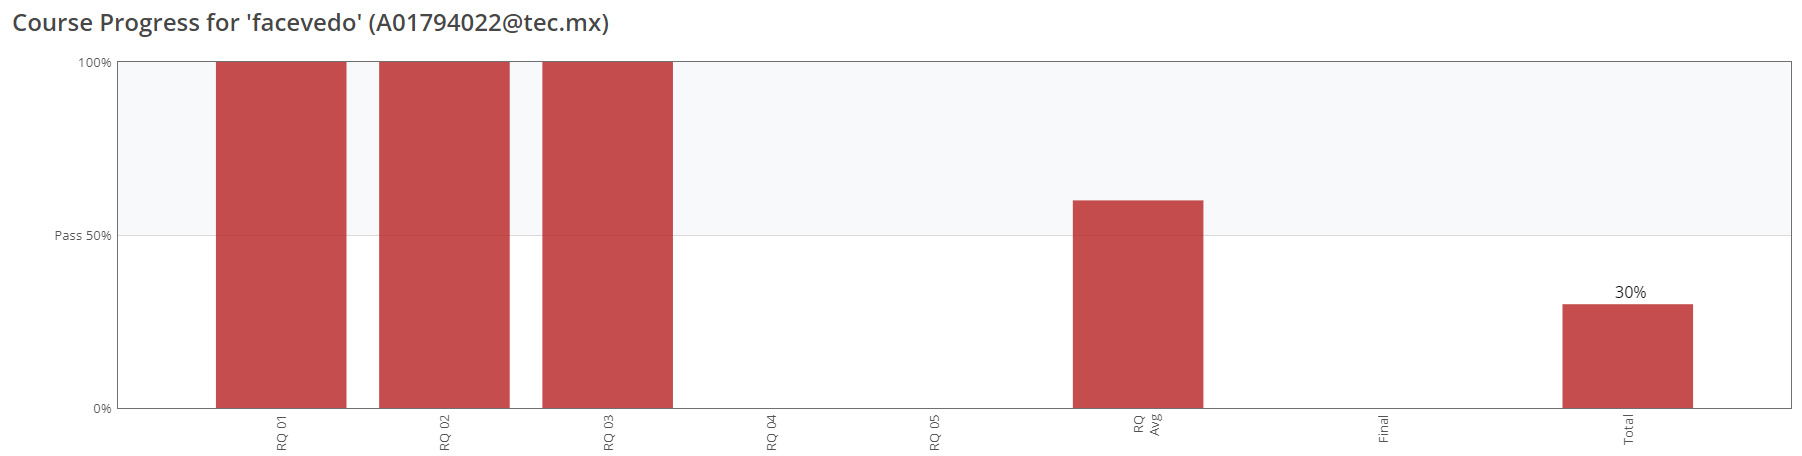